In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def EstimateBackground(grayFrames):
    height = grayFrames[0].shape[0]
    width = grayFrames[0].shape[1]
    numFrames = len(grayFrames)

    background = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            pixels = []
            # Get pixel value of all frames and append in pixels[]
            for frame in grayFrames :
                pixels.append(frame[i][j])

            # Sort and get median
            pixels.sort()

            if numFrames % 2 == 1: # odd num of frames : median is exactly in the middle
                medianIdex = numFrames // 2
                median = pixels[medianIdex]
            else : # even num of frames : 2 values in the middle (get their average)
                medianIndex1 = numFrames // 2 - 1
                medianIndex2 = numFrames // 2
                median = (pixels[medianIndex1] + pixels[medianIndex2]) // 2

            # Put median in pixel (i,j)
            background[i][j] = median

    return background

In [ ]:
def DetectMotion(grayFrames, background):
    threshold = 30
    motionFrames = []

    height = grayFrames[0].shape[0]
    width = grayFrames[0].shape[1]

    for frame in grayFrames :
        differenceImage = np.zeros((height, width), dtype=np.uint8)

        # Loop on all pixels and find difference between frames and background
        for i in range(height):
            for j in range(width):
                difference = abs(int(frame[i][j]) - int(background[i][j]))

                if difference > threshold : # motion is detected (assign (1) white)
                    differenceImage[i][j] = 255
                else : # no motion is detected (assign (0) black)
                    differenceImage[i][j] = 0
        motionFrames.append(differenceImage)

    return motionFrames

In [ ]:
def ConvertToGray(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
    cap.release()
    return frames

In [ ]:
VIDEO_PATH = "/content/video.mp4"

# Convert to grayscale
print("Loading video and converting to grayscale...")
grayVideo = ConvertToGray(VIDEO_PATH)
print(f"✓ Loaded {len(grayVideo)} frames")

Loading video and converting to grayscale...
✓ Loaded 599 frames


Detecting background...
✓ Background detected


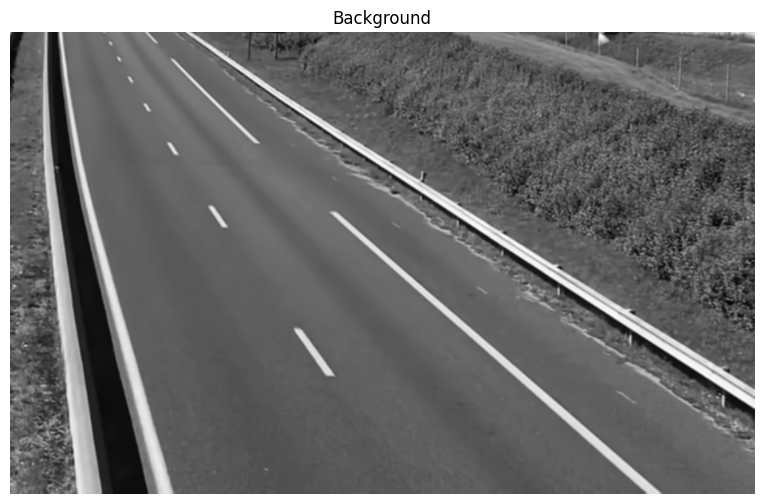

In [ ]:
print("Detecting background...")
background = EstimateBackground(grayVideo)
print("✓ Background detected")

# Display the background
plt.figure(figsize=(10, 6))
plt.imshow(background, cmap='gray')
plt.title('Background')
plt.axis('off')
plt.show()

Detecting motion in all frames...
✓ Motion detection complete! Processed 599 frames
Creating animated GIF...
✓ GIF saved as 'motion_output.gif'

Motion Detection Animation:


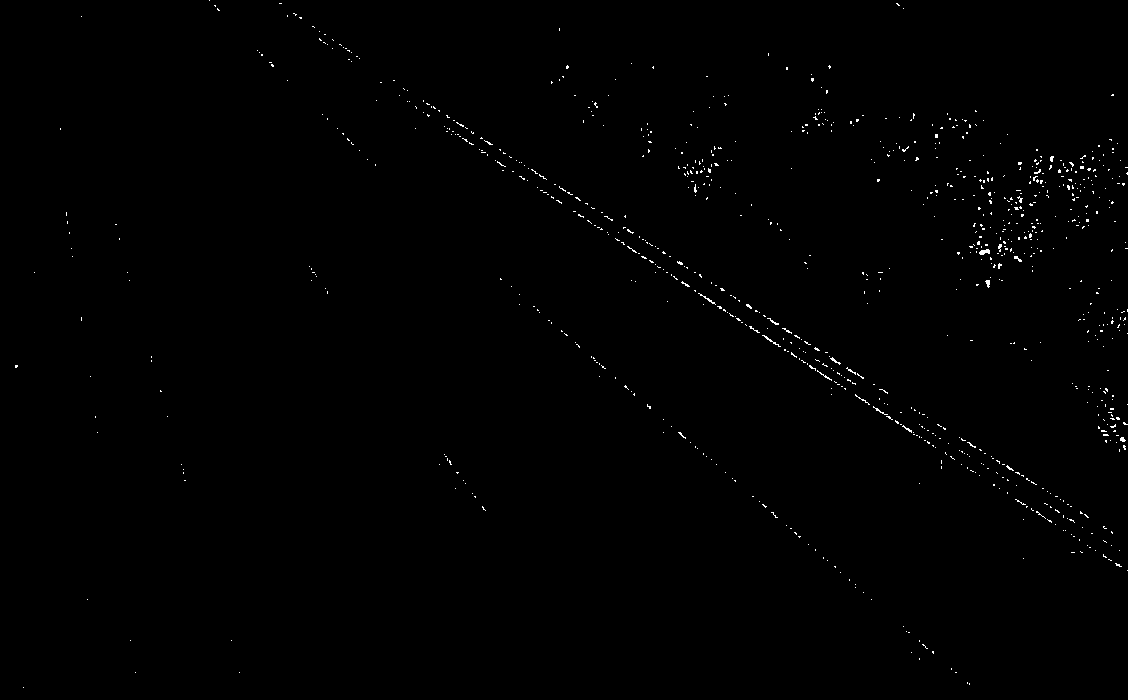

In [9]:
from PIL import Image
from IPython.display import Image as IPImage

print("Detecting motion in all frames...")
motion_frames = DetectMotion(grayVideo, background)
print(f"✓ Motion detection complete! Processed {len(motion_frames)} frames")

# Save motion video
print("Saving motion detection video...")
height, width = motion_frames[0].shape
out = cv2.VideoWriter('motion_output.mp4', cv2.VideoWriter_fourcc(*'mp4v'),
                       30, (width, height), False)

for frame in motion_frames:
    out.write(frame)
out.release()
print("✓ Motion video saved as 'motion_output.mp4'")

# Create GIF
print("Creating animated GIF...")
pil_frames = [Image.fromarray(frame) for frame in motion_frames]
pil_frames[0].save('motion_output.gif',
                   save_all=True,
                   append_images=pil_frames[1:],
                   duration=33,  # 33ms = ~30fps
                   loop=0)
print("✓ GIF saved as 'motion_output.gif'")

# Display GIF
print("\nMotion Detection Animation:")
IPImage(filename='motion_output.gif')